# Sprocket central is a bikes and accessories company who is aimed at target individuals and improvising strategy using data driven decision derived from their 3 previous years' dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [36]:
df_pro= pd.read_csv('sprocket_final.csv')
print(df_pro.shape)
df_pro.head()

(12970, 30)


,Unnamed: 0,customer_id,first_name,last_name,gender,3y_purchases,job_title,job_category,wealth_segment,D_indication,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,sold_on
0,0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
1,1,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19
2,2,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21
3,3,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09
4,4,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09


In [37]:
df_pro.drop(columns=['Unnamed: 0'],inplace = True)

In [156]:
df_cus.head()

,customer_id,first_name,last_name,gender,3y_purchases,job_title,job_category,wealth_segment,D_indication,owns_car,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,sold_on,age_bins1
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,"(65.0, 70.0)"
11,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,...,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2011-08-29,"(35.0, 40.0)"
14,9,Mala,Lind,Female,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,...,0.0,Approved,Solex,Standard,medium,large,1061.56,733.58,2015-06-17,"(45.0, 50.0)"
20,12,Sawyere,Flattman,Male,58,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,...,0.0,Approved,Giant Bicycles,Standard,medium,large,1812.75,582.48,2010-06-07,"(25.0, 30.0)"
27,13,Gabriele,Norcross,Male,38,Developer I,Financial Services,High Net Worth,N,Yes,...,0.0,Approved,Solex,Standard,medium,medium,1163.89,589.27,1996-11-09,NaN


In [38]:
newcus = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList', header = 1)
print(newcus.shape)


(1000, 23)


In [39]:
new_cus = newcus.copy()

In [40]:
new_cus.rename(columns = {'past_3_years_bike_related_purchases':'3y_purchases','deceased_indicator' :'D_indication','job_industry_category':'job_category'},inplace = True )

In [41]:
from datetime import *

today=date.today()
now =pd.to_datetime('now')
new_cus['age']= (now.year - new_cus['DOB'].dt.year) - ((now.month - new_cus['DOB'].dt.month) < 0)


new_cus.drop(columns = ['DOB'],axis = 1,inplace = True)


In [42]:
new_cus.drop(columns = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Rank', 'Value'],axis = 1,inplace = True)
new_cus.head()

,first_name,last_name,gender,3y_purchases,job_title,job_category,wealth_segment,D_indication,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,63.0
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,50.0
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,45.0
3,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,41.0
4,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,54.0


In [43]:
df_cus = df_pro.drop_duplicates(subset = 'customer_id' ,keep = 'first') 

In [45]:
df_cus.head(3)

,customer_id,first_name,last_name,gender,3y_purchases,job_title,job_category,wealth_segment,D_indication,owns_car,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,sold_on
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
11,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,...,2017-05-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2011-08-29
14,9,Mala,Lind,Female,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,...,2017-05-10,0.0,Approved,Solex,Standard,medium,large,1061.56,733.58,2015-06-17


# <I>`UNIVARIATE EXPLORATION` 

In [62]:
sb.set(font_scale=0.8)  

In [141]:
plt.rcParams.update(plt.rcParamsDefault)

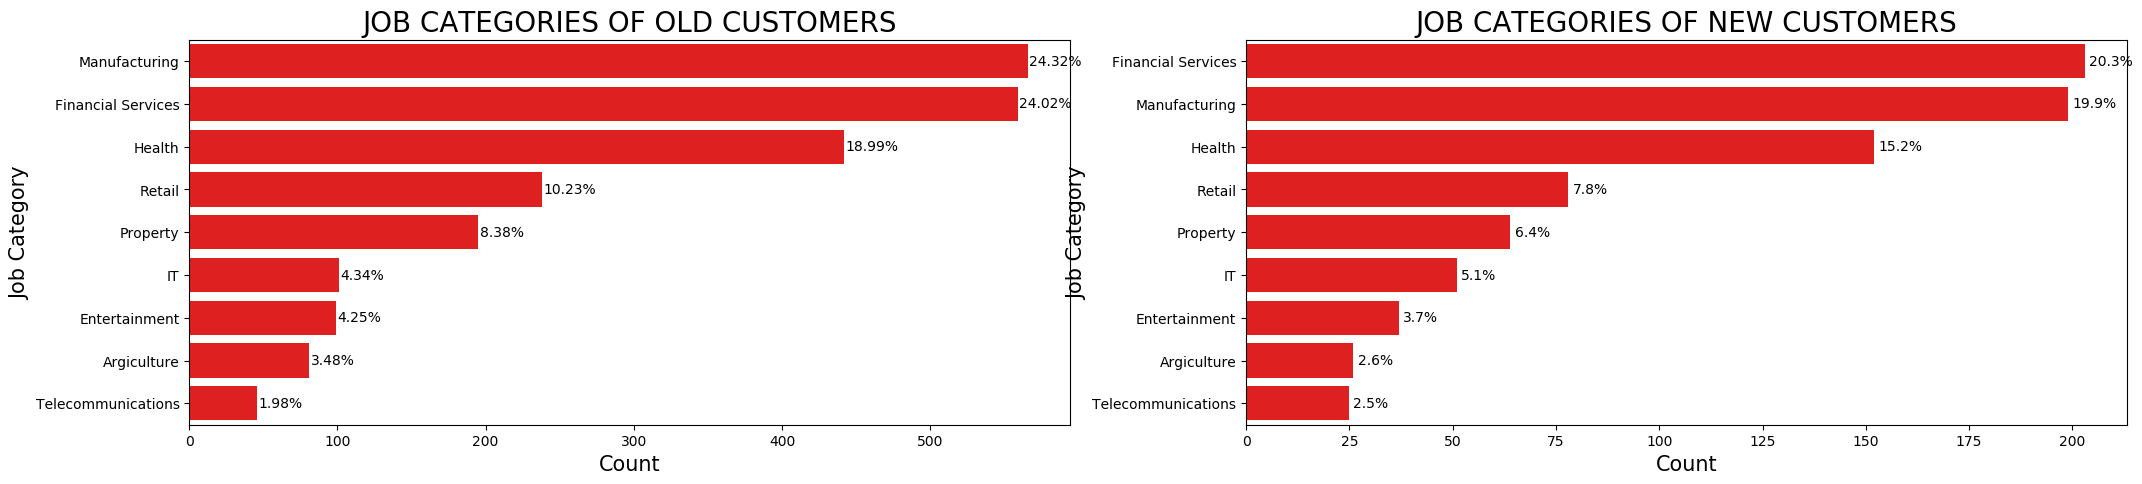

In [142]:
a = df_cus['job_category'].value_counts()
job_ord = a.index
n_df= df_cus.shape[0]

plt.figure(figsize = [25,5 ])

plt.subplot(1, 2, 1)

plt.title('JOB CATEGORIES OF OLD CUSTOMERS')

c= sb.countplot(data =df_cus ,y= df_cus['job_category'], color = 'red', order = job_ord );
c.set_xlabel("Count",fontsize=15)
c.set_ylabel("Job Category",fontsize=15)
c.axes.set_title('JOB CATEGORIES OF OLD CUSTOMERS',fontsize=20)

for i in range(a.shape[0]):
  count =a[i]
  pct_string = np.round(100*count/n_df,2)
  pct_string = ("{}%".format(pct_string))
  plt.text(count+1,i,pct_string,va='center');
    
b = new_cus['job_category'].value_counts()
newjobord = new_cus['job_category'].value_counts().index
n_newcus = new_cus.shape[0]

plt.subplot(1,2,2)
plt.title('JOB CATEGORIES OF NEW CUSTOMERS')
d = sb.countplot(data =new_cus ,y= new_cus['job_category'], color = 'red', order = newjobord );
d.set_xlabel("Count",fontsize=15)
d.set_ylabel("Job Category",fontsize=15)
d.axes.set_title('JOB CATEGORIES OF NEW CUSTOMERS',fontsize=20)

for i in range(b.shape[0]):
  count =b[i]
  pct_string = np.round(100*count/n_newcus,2)
  pct_string = ("{}%".format(pct_string))
  plt.text(count+1,i,pct_string,va='center');

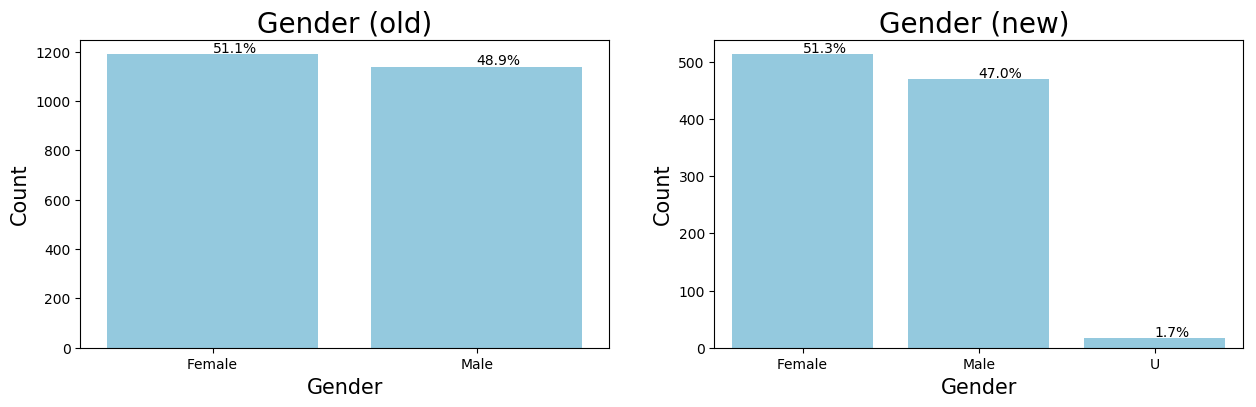

In [155]:
plt.rcParams.update(plt.rcParamsDefault)

gender_counts = df_cus['gender'].value_counts()
gen_ord = df_cus['gender'].value_counts().index

plt.figure(figsize = [15,4])

plt.subplot(1, 2, 1)

c= sb.countplot(data =df_cus ,x = df_cus['gender'], color = 'skyblue', order = gen_ord );
c.set_xlabel("Gender",fontsize=15)
c.set_ylabel("Count",fontsize=15)
c.axes.set_title('Gender (old)',fontsize=20)

for i in range(gender_counts.shape[0]):
  count =gender_counts[i]
  pct_string = np.round(100*count/n_df,2)
  pct_string = ("{}%".format(pct_string))
  plt.text(i,count+25,pct_string,va='center');

gender_counts = new_cus['gender'].value_counts()
gen_ord =  new_cus['gender'].value_counts().index
n_dff =new_cus.shape[0]

plt.subplot(1,2,2)



c= sb.countplot(data = new_cus ,x =  new_cus['gender'], color = 'skyblue', order = gen_ord );
c.set_xlabel("Gender",fontsize=15)
c.set_ylabel("Count",fontsize=15)
c.axes.set_title('Gender (new) ',fontsize=20)


for i in range(gender_counts.shape[0]):
  count =gender_counts[i]
  pct_string = np.round(100*count/n_dff,2)
  pct_string = ("{}%".format(pct_string))
  plt.text(i,count+10,pct_string,va='center');
    



In [76]:
base_color = sb.color_palette()[0]

In [77]:
interval_range = pd.interval_range(start=15, freq=5, end=90,closed='neither')
df_cus['age_bins1'] = pd.cut(df_cus['age'], bins=interval_range)


interval_range2 = pd.interval_range(start=15, freq=5, end=90,closed='neither')
new_cus['age_bins1'] = pd.cut(new_cus['age'], bins=interval_range2)

agebin_counts = df_cus['age_bins1'].value_counts()
num = df_cus['age_bins1'].shape[0]

agebin_counts2 = new_cus['age_bins1'].value_counts()
num2 = new_cus['age_bins1'].shape[0]

C:\Users\MALA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


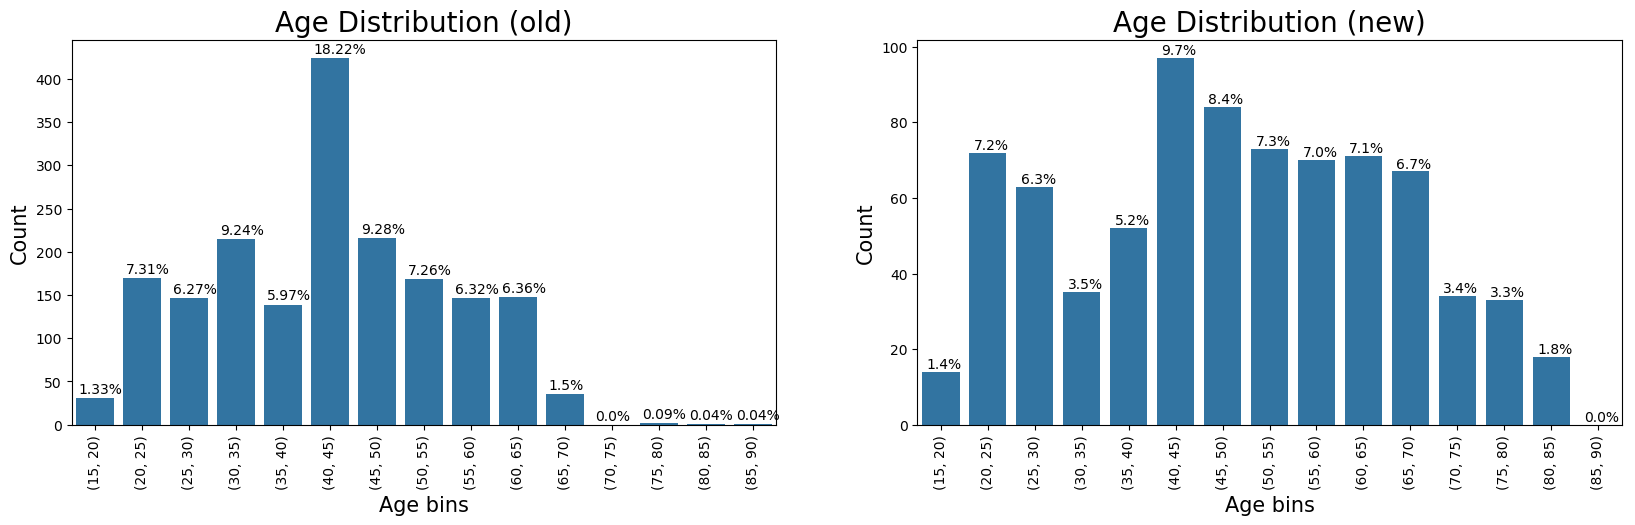

In [80]:
plt.figure(figsize = [20,5 ])
#plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.3, wspace=0.8)
# code for the bar chart
plt.subplot(1, 2, 1)

c= sb.countplot(data = df_cus ,x =  df_cus['age_bins1'], color = base_color);
plt.xticks(rotation = 90)
c.set_xlabel("Age bins",fontsize=15)
c.set_ylabel("Count",fontsize=15)
c.axes.set_title('Age Distribution (old)',fontsize=20)

for i in range(agebin_counts.shape[0]):
  count =agebin_counts[i]
  pct_string = np.round(100*count/num,2)
  pct_string = ("{}%".format(pct_string))
  plt.text(i-0.35,count+10,pct_string,va='center');



plt.subplot(1,2,2)

c= sb.countplot(data =new_cus ,x = new_cus['age_bins1'], color = base_color);
plt.xticks(rotation = 90)
c.set_xlabel("Age bins",fontsize=15)
c.set_ylabel("Count",fontsize=15)
c.axes.set_title('Age Distribution (new)',fontsize=20)


for i in range(agebin_counts2.shape[0]):
  count =agebin_counts2[i]
  pct_string = np.round(100*count/num2,2)
  pct_string = ("{}%".format(pct_string))
  plt.text(i-0.3,count+2,pct_string,va='center');

Mass Customer        1141
High Net Worth        599
Affluent Customer     587
Name: wealth_segment, dtype: int64
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64


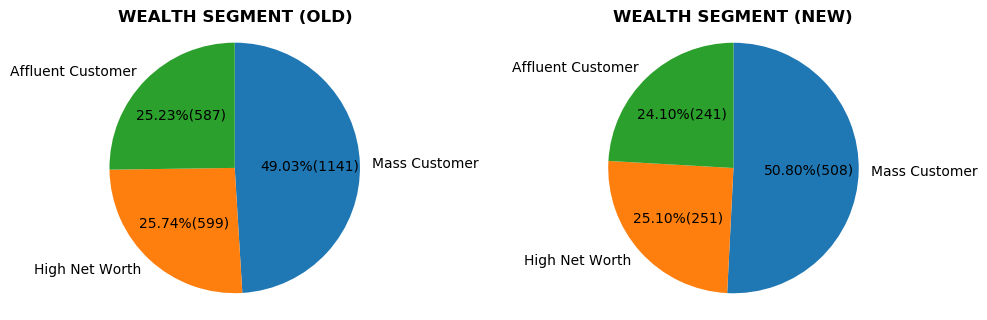

In [82]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

values1 = df_cus['wealth_segment'].value_counts()
print(values1)
values2 = new_cus['wealth_segment'].value_counts()
print(values2)

plt.figure(figsize = [10, 5])
plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.3, wspace=0.8)
# code for the bar chart
plt.subplot(1, 2, 1)

plt.pie(values1, labels = values1.index, startangle = 90,
        counterclock = False,autopct=make_autopct(values1));
plt.title('WEALTH SEGMENT (OLD)', fontdict= {'fontsize': '12','fontweight' :'semibold'})
plt.axis('square');

plt.subplot(1,2,2)
plt.pie(values2, labels = values2.index, startangle = 90,
        counterclock = False,autopct=make_autopct(values2));
plt.title('WEALTH SEGMENT (NEW)', fontdict= {'fontsize': '12','fontweight' :'semibold'})
plt.axis('square');

# <I>`BIVARIATE EXPLORATION` 

In [83]:
m = df_cus.query('gender== "Female"')['3y_purchases'].sum()
m

n =df_cus.query('gender== "Male"')['3y_purchases'].sum()
n

kk =m+n 

gender_counts = df_cus['gender'].value_counts()
gender_counts.shape[0]

hh = [m,n]
hh

m1 = new_cus.query('gender== "Female"')['3y_purchases'].sum()
m1

n1 =new_cus.query('gender== "Male"')['3y_purchases'].sum()
n1

o1 =new_cus.query('gender== "U"')['3y_purchases'].sum()
o1

kk1 =m1+n1+o1 

gender_counts1 = new_cus['gender'].value_counts()
gender_counts1.shape[0]

hh1 = [m1,n1,o1]
hh1

[25212, 23765, 859]

Text(0.5, 0.98, 'Purchases done in last 3 years')

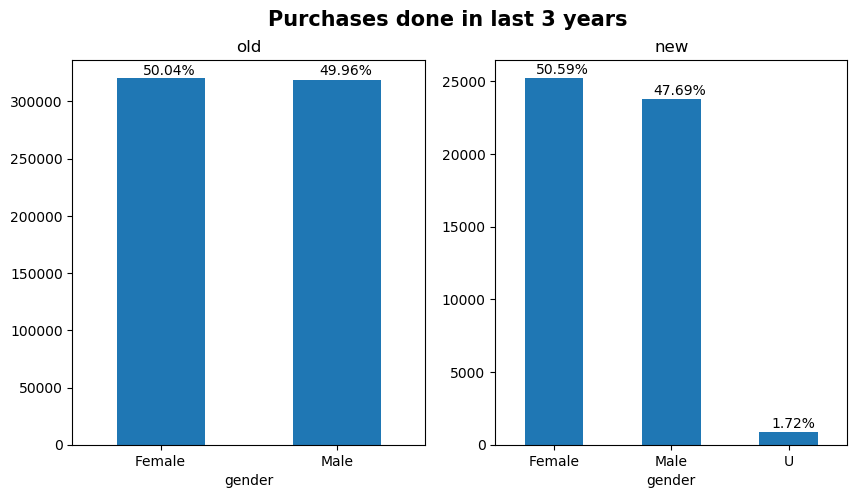

In [98]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)

df_copy.groupby('gender')['3y_purchases'].agg(lambda x: sum(x)).plot(kind='bar')
plt.xticks(rotation = 0)
plt.title('old')
for i in range(gender_counts.shape[0]):
  count =hh[i]
  pct_string = np.round(100*count/kk,2)
  pct_string = ("{}%".format(pct_string))
  plt.text(i-0.1,count+270000,pct_string,va='center');
    
plt.subplot(1,2,2)   
new_cus.groupby('gender')['3y_purchases'].agg(lambda x: sum(x)).plot(kind='bar')
plt.xticks(rotation = 0)
plt.title('new')
for i in range(gender_counts1.shape[0]):
  count =hh1[i]
  pct_string = np.round(100*count/kk1,2)
  pct_string = ("{}%".format(pct_string))
  plt.text(i-0.15,count+600,pct_string,va='center');

plt.suptitle("Purchases done in last 3 years", fontsize ='15',fontweight='semibold')

In [146]:
base_color = sb.color_palette()[0]

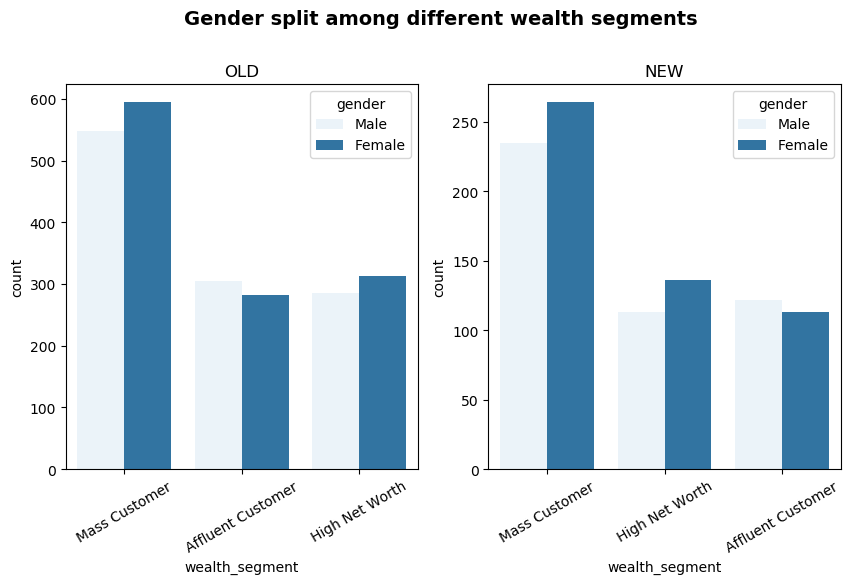

In [148]:
data = new_cus[new_cus['gender']== 'Male']
data2 = new_cus[new_cus['gender']== 'Female']
frames = [data, data2]

result = pd.concat(frames)


plt.figure(figsize = [10, 5])


plt.subplot(1, 2, 1)

g =sb.countplot(data =df_cus, x='wealth_segment', hue = 'gender',hue_order = ['Male','Female'] ,color = base_color);
g.set_title('OLD')
plt.xticks(rotation = 30)

plt.subplot(1, 2, 2)
g =sb.countplot(data=result, x='wealth_segment', hue = 'gender',color = base_color);
g.set_title('NEW')
plt.xticks(rotation = 30)
plt.suptitle('Gender split among different wealth segments', y=1.03, fontsize=14, fontweight='semibold');

Text(0.5, 0.98, 'Sales contributed by people owning cars and not owning cars')

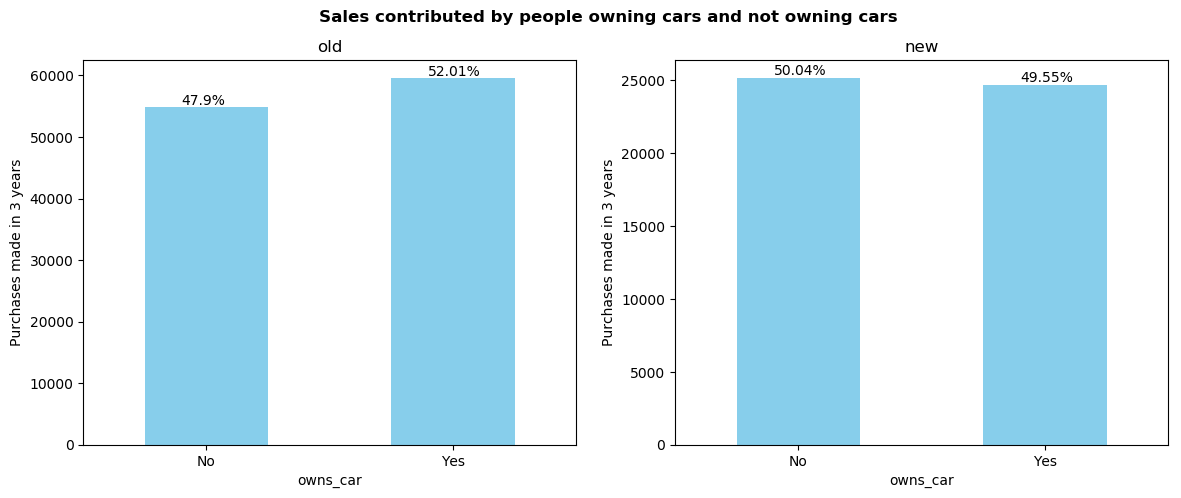

In [151]:
gend = df_cus.groupby('owns_car').sum()
gend



total3y = gend['3y_purchases'].sum()

thy_counts = gend['3y_purchases'].value_counts()
thy_counts

arr =[] 
e= 54958
r=59582
arr.append('47.9%')
arr.append('52.01%')

ar=[]
ar.append(e)
ar.append(r)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)


gend['3y_purchases'].plot(kind= 'bar',color ="skyblue")

plt.xticks(rotation = 0)
plt.ylabel("Purchases made in 3 years")
plt.text(0-0.1,ar[0]+1000,arr[0],va='center');
plt.text(1-0.1,ar[1]+1000,arr[1],va='center');
plt.title('old')


gend = new_cus.groupby('owns_car').sum()
gend



total3y = gend['3y_purchases'].sum()

thy_counts = gend['3y_purchases'].value_counts()
thy_counts

arr =[] 
e= 24686
r=25150
arr.append('49.55%')
arr.append('50.04%')

ar=[]
ar.append(e)
ar.append(r)

plt.subplot(1,2,2)
gend['3y_purchases'].plot(kind= 'bar',color ="skyblue")
plt.xticks(rotation = 0)
plt.ylabel("Purchases made in 3 years")
plt.text(0-0.1,ar[0]+1000,arr[1],va='center');
plt.text(1-0.1,ar[1],arr[0],va='center');
plt.title("new")


plt.suptitle("Sales contributed by people owning cars and not owning cars", fontweight = 'semibold')

# <I>`MULTIVARIATE EXPLORATION` 

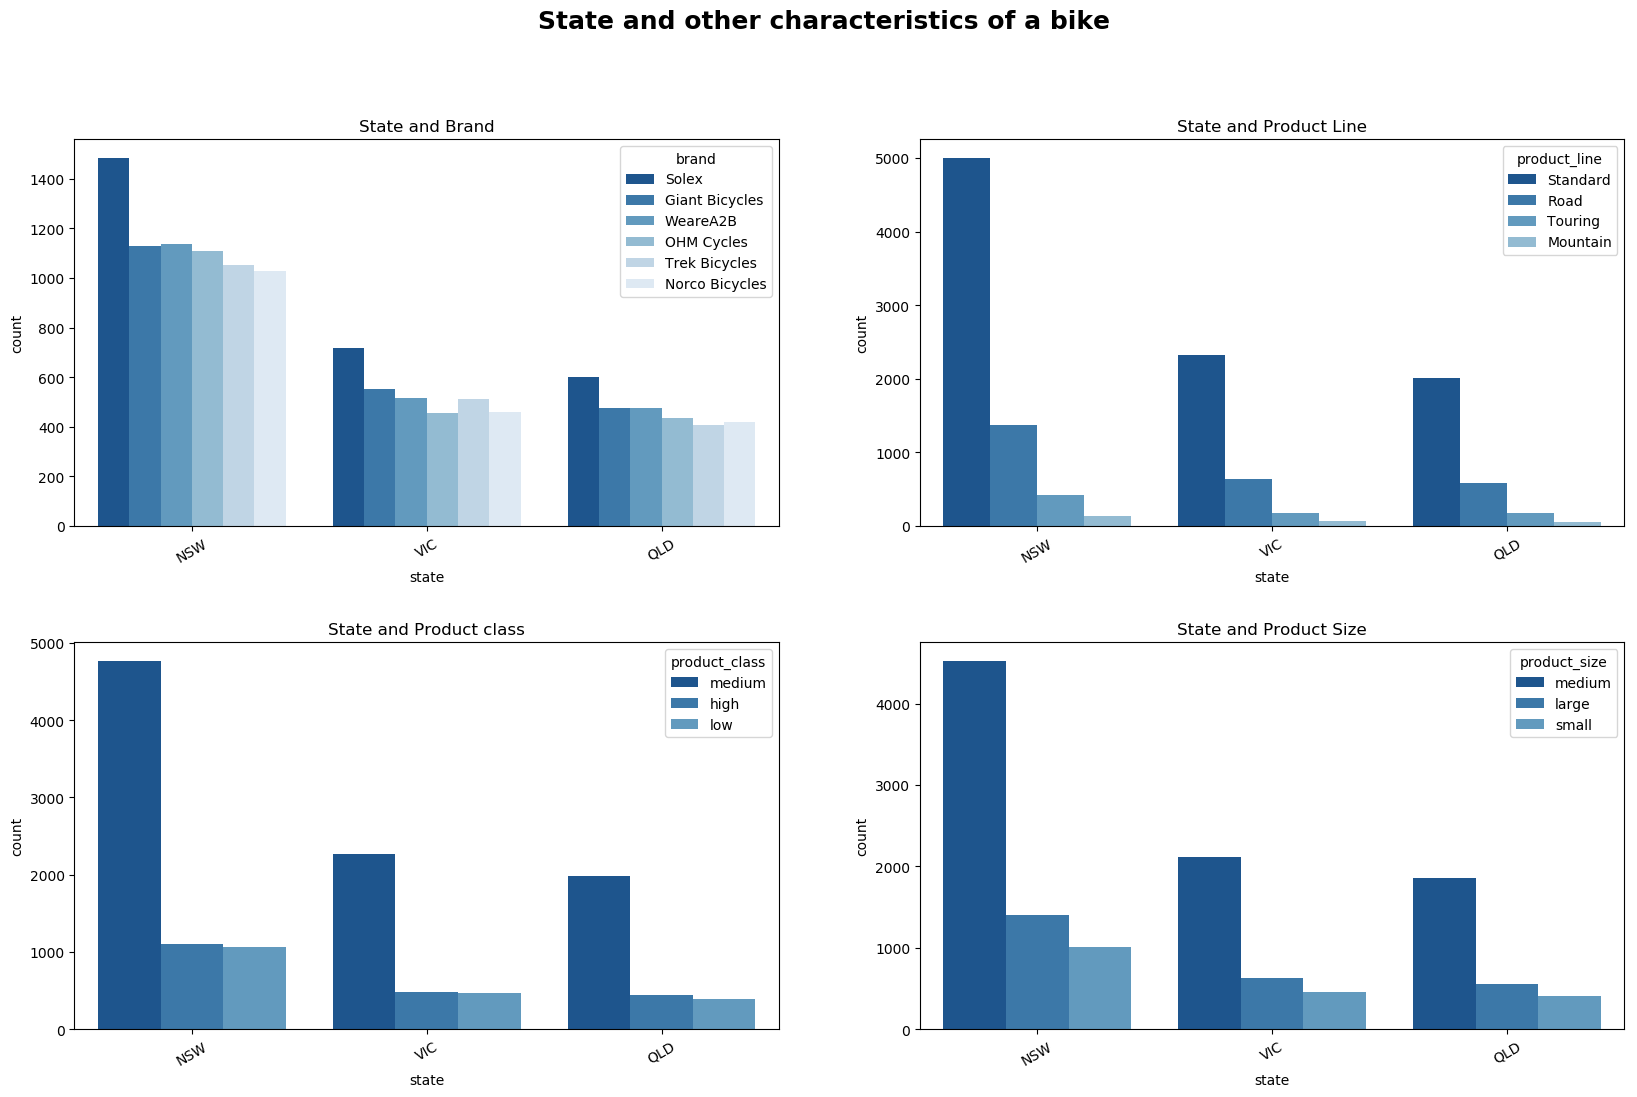

In [102]:
plt.figure(figsize = [20, 10])
plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.3, wspace=0.2)

plt.subplot(2, 2, 1)

g =sb.countplot(data =df_pro, x='state', order =df_pro['state'].value_counts().index, hue = 'brand',
                hue_order= df_pro['brand'].value_counts().index,palette=sb.color_palette("Blues_r"));
g.set_title('State and Brand')
plt.xticks(rotation = 30)

plt.subplot(2, 2, 2)


h=sb.countplot(data =df_pro, x='state', order =df_pro['state'].value_counts().index,hue = 'product_line',
                hue_order= df_pro['product_line'].value_counts().index,palette=sb.color_palette("Blues_r"));
h.set_title('State and Product Line')
plt.xticks(rotation = 30)



plt.subplot(2, 2, 3)
j =sb.countplot(data =df_pro, x='state', order =df_pro['state'].value_counts().index,hue = 'product_class',
                 hue_order= df_pro['product_class'].value_counts().index,palette=sb.color_palette("Blues_r"));
j.set_title('State and Product class')
plt.xticks(rotation = 30)



plt.subplot(2, 2, 4)
k =sb.countplot(data =df_pro, x='state', order =df_pro['state'].value_counts().index, hue = 'product_size',
                hue_order= df_pro['product_size'].value_counts().index,palette=sb.color_palette("Blues_r"));
k.set_title('State and Product Size')
plt.xticks(rotation = 30)

plt.suptitle('State and other characteristics of a bike', y=1.03, fontsize=18, fontweight='semibold');

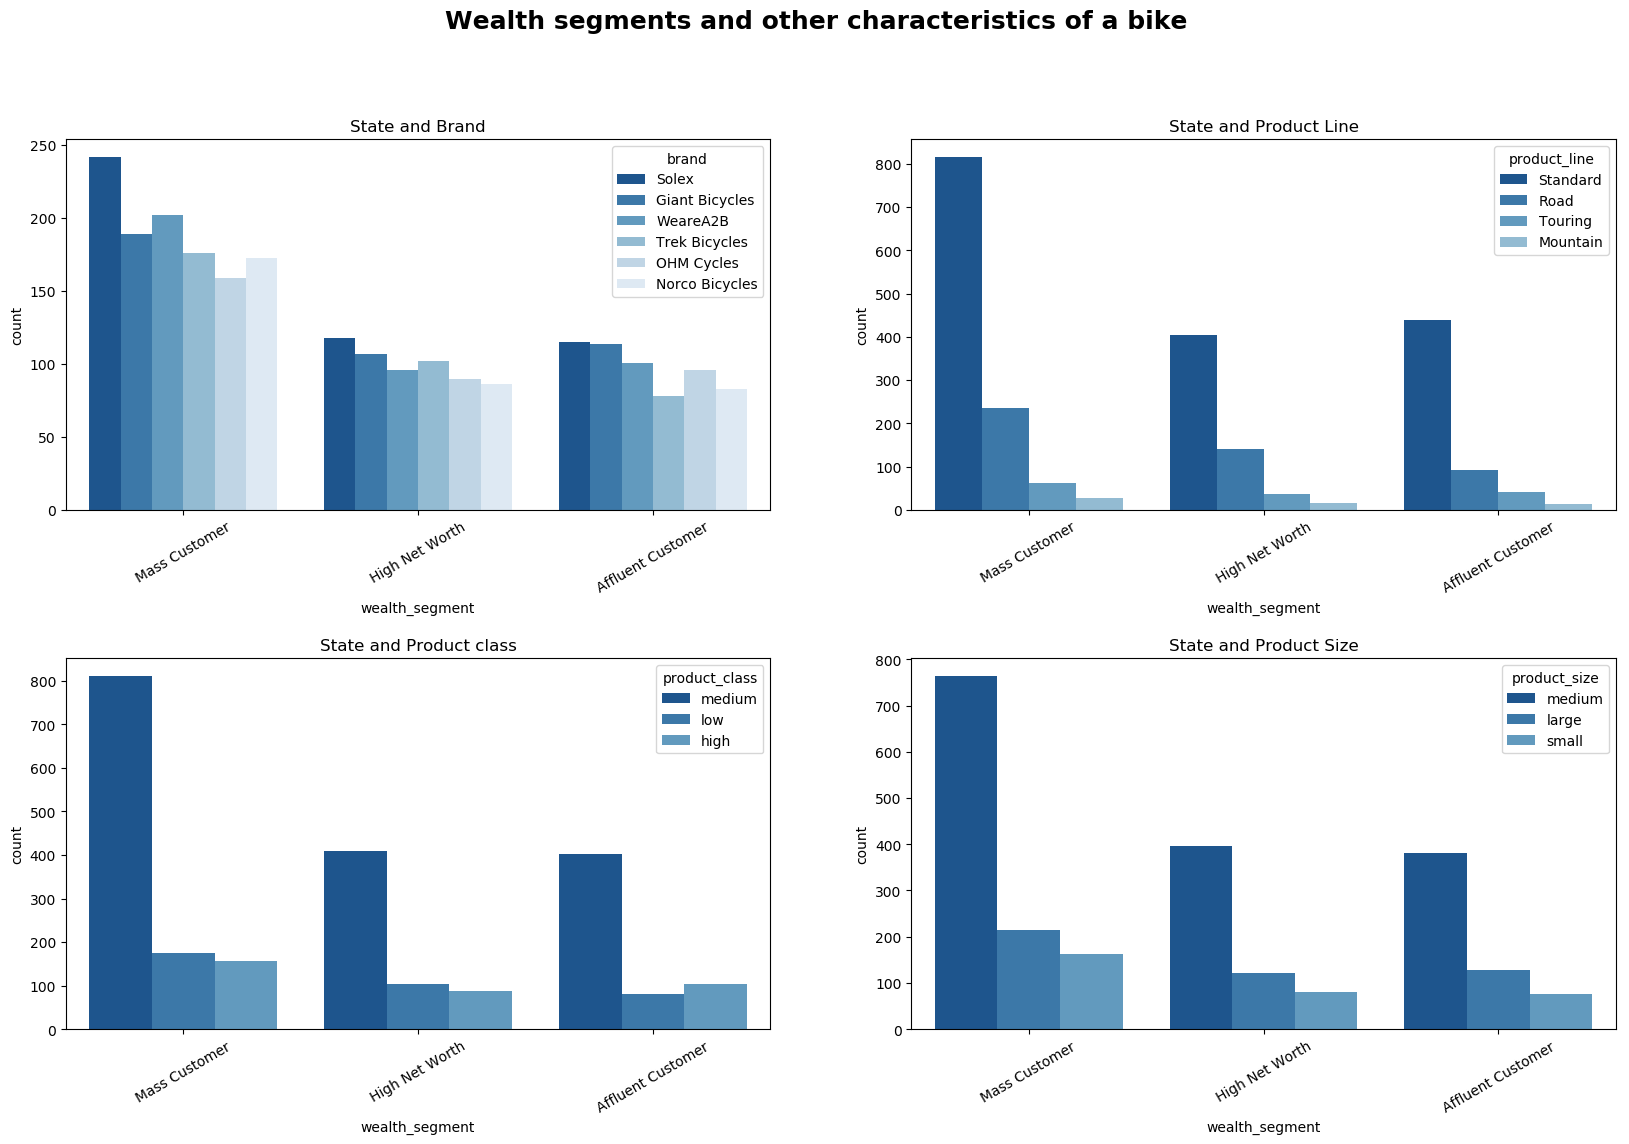

In [103]:
plt.figure(figsize = [20, 10])
plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.4, wspace=0.2)

plt.subplot(2, 2, 1)

g =sb.countplot(data =df_cus, x='wealth_segment', order =df_cus['wealth_segment'].value_counts().index, hue = 'brand',
                hue_order= df_cus['brand'].value_counts().index,palette=sb.color_palette("Blues_r"));
g.set_title('State and Brand')
plt.xticks(rotation = 30)

plt.subplot(2, 2, 2)


h=sb.countplot(data =df_cus, x='wealth_segment', order =df_cus['wealth_segment'].value_counts().index,hue = 'product_line',
                hue_order= df_cus['product_line'].value_counts().index,palette=sb.color_palette("Blues_r"));
h.set_title('State and Product Line')
plt.xticks(rotation = 30)



plt.subplot(2, 2, 3)
j =sb.countplot(data =df_cus, x='wealth_segment', order =df_cus['wealth_segment'].value_counts().index,hue = 'product_class',
                 hue_order= df_cus['product_class'].value_counts().index,palette=sb.color_palette("Blues_r"));
j.set_title('State and Product class')
plt.xticks(rotation = 30)



plt.subplot(2, 2, 4)
k =sb.countplot(data =df_cus, x='wealth_segment', order =df_cus['wealth_segment'].value_counts().index, hue = 'product_size',
                hue_order= df_cus['product_size'].value_counts().index,palette=sb.color_palette("Blues_r"));
k.set_title('State and Product Size')
plt.xticks(rotation = 30)

plt.suptitle('Wealth segments and other characteristics of a bike', y=1.03, fontsize=18, fontweight='semibold');

In [131]:
A = df_cus[(df_cus['state']=='NSW') & (df_cus['owns_car']=='Yes')]['3y_purchases'].sum()

B= df_cus[(df_cus['state']=='NSW') & (df_cus['owns_car']=='No')]['3y_purchases'].sum()

C= df_cus[(df_cus['state']=='VIC') & (df_cus['owns_car']=='Yes')]['3y_purchases'].sum()

D = df_cus[(df_cus['state']=='VIC') & (df_cus['owns_car']=='No')]['3y_purchases'].sum()

E= df_cus[(df_cus['state']=='QLD') & (df_cus['owns_car']=='Yes')]['3y_purchases'].sum()

F =df_cus[(df_cus['state']=='QLD') & (df_cus['owns_car']=='No')]['3y_purchases'].sum()

data = {'State':['NSW','NSW', 'QLD','QLD','VIC', 'VIC'], 'owns_car':['Yes','No','Yes','No','Yes','No'],'purchase_made': [A,B,C,D,E,F]} 
  
# Create df_cusrame 
df_temp = pd.DataFrame(data) 

df_temp

,State,owns_car,purchase_made
0,NSW,Yes,32086
1,NSW,No,29581
2,QLD,Yes,14849
3,QLD,No,13568
4,VIC,Yes,12647
5,VIC,No,11809


In [134]:
AA = new_cus[(new_cus['state']=='NSW') & (new_cus['owns_car']=='Yes')]['3y_purchases'].sum()

BB= new_cus[(new_cus['state']=='NSW') & (new_cus['owns_car']=='No')]['3y_purchases'].sum()

CC= new_cus[(new_cus['state']=='QLD') & (new_cus['owns_car']=='Yes')]['3y_purchases'].sum()

DD = new_cus[(new_cus['state']=='QLD') & (new_cus['owns_car']=='No')]['3y_purchases'].sum()

EE= new_cus[(new_cus['state']=='VIC') & (new_cus['owns_car']=='Yes')]['3y_purchases'].sum()

FF =new_cus[(new_cus['state']=='VIC') & (new_cus['owns_car']=='No')]['3y_purchases'].sum()

data2 = {'State':['NSW','NSW', 'QLD','QLD','VIC', 'VIC'], 'owns_car':['Yes','No','Yes','No','Yes','No'],'purchase_made': [A,B,C,D,E,F]} 
  
# Create DataFrame 
df_temp2 = pd.DataFrame(data2) 
df_temp2

,State,owns_car,purchase_made
0,NSW,Yes,32086
1,NSW,No,29581
2,QLD,Yes,14849
3,QLD,No,13568
4,VIC,Yes,12647
5,VIC,No,11809


Text(0.5, 0.98, 'Purchase done in each state by customers with or without car ')

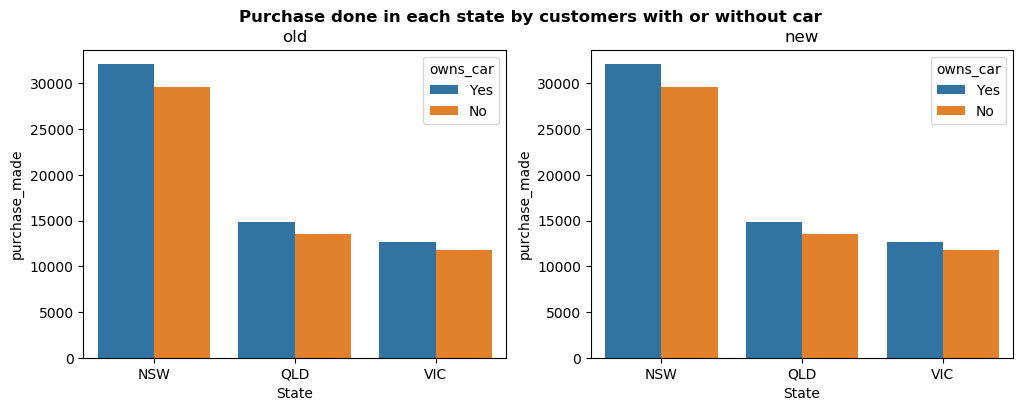

In [140]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
g =sb.barplot(data =df_temp, x='State',y ='purchase_made', hue = 'owns_car')
plt.title('old')

plt.subplot(1,2,2)
g =sb.barplot(data =df_temp2, x='State',y ='purchase_made', hue = 'owns_car')
plt.title('new')


plt.suptitle('Purchase done in each state by customers with or without car ', fontweight = 'semibold')